# Appendix B : wiggles explained 

In this notebook we insert all code needed to make Appendix  B figure.  Other experiments are kept in D_Fig_2_CRTS_sel_r_cut

In [1]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import datetime
from astroML.stats import median_sigmaG
from scipy.stats import binned_statistic
from scipy.optimize import curve_fit

import CRTS_paper_modules as mod
import imp
imp.reload(mod)
#reload(mod)

<module 'CRTS_paper_modules' from '/Users/chris/GradResearch/CRTS_PROJECT/code/CRTS_paper_modules.py'>

In [2]:
cols1, qso_cat = mod.get_qso_catalog() 
cols2 , star_cat= mod.get_stars_catalog()

Zipping CRTS-SDSS quasars catalog from ../data_products/CRTS_SDSS_catalogs/CRTS_SDSS_cross_matched_qso_DB_QSO_catalog.txt
Read in 7601 quasars from CRTS
zipping CRTS-SDSS stars catalog...
Read in catalog for 48250 stars from CRTS 


"The motivation for the additional panel is that it seems to me that the oscillation
problem might not have anything to do with the actual sample size. It could be that
systematic photometric calibration errors are large when comparing data obtained
six months apart than for data obtained at the same time of year. To test this
hypothesis, I propose to redo the middle panel (sigmaG with raw measurements)
as the 6th panel where, instead of using all the data points when computing sigmaG,
you *randomly subselect* 20,000 points. This number comes from the bottom panel 
where I see that counts vary from about 200,000 to about 0. Choosing a random
sample of 20,000 points will allow you to get good results to beyond t2-t1 ~ 1500
and thus you should see (or not) the first four wiggles in sigmaG. I think that the
amplitude of sigmaG for the first four wiggles will remain about the same when you 
always use 20,000 random points (when you have fewer than 20,000 points, don’t
plot any points). This will demonstrate that the wiggles are not due to varying 
sample size. If the amplitude becomes much smaller instead, then I am wrong
about calibration problems and the oscillations are indeed caused (somehow)
by the varying sample size."  (Zeljko's email   5/4/17 )  



In [3]:
# Code to select a sample of xi , ei points, treating all 
# stars together ... 
# this is what makes  detail_dic{}

imp.reload(mod)

Min_arr = [17, 18,   18.5 ]
Max_arr = [18, 18.5, 19   ]

detail_dic = {}
#detail_dic['qso'] = {}
detail_dic['stars'] = {}

mag = 'r'   # which magnitudes to use for cutting and reporting 
inDirStars   = '../data_products/sf_file_per_LC/stars/'
inDirQSO = '../data_products/sf_file_per_LC/qso_detailed/'
        

for i in range(len(Min_arr)):
    Min = Min_arr[i]
    Max = Max_arr[i]

    print('\nUsing now only lightcurves with SDSS  %f< %s < %f' % (Min, mag, Max))
     
    # no need for QSO to prove our point... 
    #detail_dic['qso'][Min] = mod.faster_read_xi_ei(inDirSF = inDirQSO, 
    #                                               good_ids= mod.cut_qso(qso_cat=qso_cat, mMin = Min, 
    #                                               mMax=Max, mErrMax = 0.3, cut_mag=mag), detailed=True)

    # we combine blue and red stars by choosing g-i from   -1 to 1 and 1 to 3 together 
    detail_dic['stars'][Min] = mod.faster_read_xi_ei(inDirSF =inDirStars,  
                               good_ids = mod.cut_stars(star_cat = star_cat, mMin = Min, 
                               mMax=Max, mErrMax = 0.3, gi_Min = -1, gi_Max=3, 
                               cut_mag=mag + '_mMed'), 
                               detailed=None)


    


Using now only lightcurves with SDSS  17.000000< r < 18.000000

Choosing stars with  SDSS   -1.00<g-i<3.00
 These cuts reduced the number of stars  in the sample from 48250 to 5790

Reading in tau,xi,ei  for 5790 objects

Using structure function master files from ../data_products/sf_file_per_LC/stars/
[##########] 100.00%
Finished reading all master files for the selected objects ...

Using now only lightcurves with SDSS  18.000000< r < 18.500000

Choosing stars with  SDSS   -1.00<g-i<3.00
 These cuts reduced the number of stars  in the sample from 48250 to 3487

Reading in tau,xi,ei  for 3487 objects

Using structure function master files from ../data_products/sf_file_per_LC/stars/
[######### ] 99.94%
Finished reading all master files for the selected objects ...

Using now only lightcurves with SDSS  18.500000< r < 19.000000

Choosing stars with  SDSS   -1.00<g-i<3.00
 These cuts reduced the number of stars  in the sample from 48250 to 3825

Reading in tau,xi,ei  for 3825 objects



In [5]:
# Make a new dir ... 
# Set a directory to save the results...
outDir = os.path.join(os.getcwd()[:-4],'data_products/'+'Fig_B1_data', 
                      datetime.datetime.now().strftime('%Y-%m-%d')+ '/')
if not os.path.exists(outDir): os.system('mkdir %s' % outDir)
                      
print('Today we will save our Fig_B1 files in %s'%outDir)

Today we will save our Fig_B1 files in /Users/chris/GradResearch/CRTS_PROJECT/data_products/Fig_B1_data/2017-08-15/


In [4]:
#detail_dic

In [6]:
# Save the  detailed_dic dictionary into files organised by object - Min - Max 
for obj in detail_dic.keys(): 
    for i in range(len(Min_arr)) : 
        Min = Min_arr[i]
        Max = Max_arr[i]
        np.save(outDir + obj+'_' +str(Min)+'-'+str(Max) , detail_dic[obj][Min])

In [ ]:
########################################################################
# Read detail_dic  using the code above : reproduced here for clarity 
########################################################################

#outDir = '../data_products/Fig_2_data/2017-04-19/'

# Load the files if needed later ....
detail_dic = {}
for obj in ['qso', 'stars'] : 
    detail_dic[obj] = {}
    
    for i in range(len(Min_arr)) : 
        Min = Min_arr[i]
        Max = Max_arr[i]
        detail_dic[obj][Min] = np.load(outDir + obj+'_' +str(Min)+'-'+str(Max)+'.npy').item()
        
print('Read detailed xi, ei data from %s'%outDir)

In [7]:
import matplotlib 
from matplotlib import rcParams
#matplotlib.rcParams['font.size'] = 17
#matplotlib.rc('xtick', labelsize=15) 
#matplotlib.rc('ytick', labelsize=15) 
rcParams['ytick.labelsize'] = 25
rcParams['xtick.labelsize'] = 25
rcParams['axes.labelsize'] = 35
rcParams['axes.linewidth'] = 3
rcParams['font.size'] = 25

In [8]:
# Do random selection and calculating mean tau ... 
# So that plotting can be done separately with just 
# a small fraction of data ... 

#bin_size_days = 20
obj = 'stars'

plot_dic = {}

for Min , Max in zip([17,18,18.5], [18,18.5,19]):
    plot_dic[Min] = {}
    
    # read in the points 
    tau = detail_dic[obj][Min]['tau']
    xi  = detail_dic[obj][Min]['xi']

    # randomly  select points...
    # sigmaG (raw measurements ) : randomly subselect 20000 points 
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html 
    indices = np.arange(len(xi))
    size = 20000 

    # first split xi, tau into 200 bins  
    stats_temp = binned_statistic(tau, xi, statistic='count', bins=200)

    # go over each bin, and calculate the sigmaG(xi) using random resample of N points.
    sigmaG_xi = np.zeros_like(stats_temp.statistic)
    N_pts  = 20000

    sigmaG = lambda x : 0.7413 *(np.percentile(x,75) - np.percentile(x,25))

    for N in np.sort(np.unique(stats_temp.binnumber)): 
        xi_per_bin = xi[stats_temp.binnumber == N] # choose points in the N-th bin
        # randomly select 'N_pts'  from each bin. 
        # If there is less than N_pts in the bin,  then return NaN
        if len(xi_per_bin) >= N_pts : 
            # randomly select N_pts points, and make sure that each point 
            # is drawn only once ! 
            xi_sample = np.random.choice(xi_per_bin, size = N_pts, replace = False)
            sigmaG_xi[N-1] = sigmaG(xi_sample)
        else :  # if the number of points per bin is less than N_pts, then set 
            # the sigmaG to nan, or 0, or some other number. 
            sigmaG_xi[N-1] = np.nan 

    mean_tau = (stats_temp.bin_edges[:-1] + stats_temp.bin_edges[1:])/2
    bin_sigmaG = sigmaG_xi

    plot_dic[Min]['mean_tau'] = mean_tau
    plot_dic[Min]['bin_sigmaG'] = bin_sigmaG



In [10]:
plot_dic

{17: {'bin_sigmaG': array([ 0.05848857,  0.05537511,  0.05915574,  0.0562832 ,  0.06189855,
          0.05737662,  0.06325142,  0.05893335,  0.06486375,  0.0622692 ,
          0.0681996 ,  0.0681996 ,  0.06857025,  0.06271398,  0.0659757 ,
          0.05841444,  0.06263985,  0.05932253,  0.06199121,  0.05819205,
          0.06100899,  0.05843297,  0.05848857,  0.05700597,  0.05745075,
          0.0607866 ,  0.05806232,  0.06390006,  0.05917427,  0.06464136,
          0.05961905,  0.0644931 ,  0.06115725,  0.06701352,  0.06805134,
          0.06643901,  0.06508614,  0.06471549,  0.06175029,  0.06538266,
          0.06182442,  0.06604983,  0.06263985,  0.06338115,  0.05871096,
          0.05871096,  0.05895188,  0.05767314,  0.06056421,  0.05804379,
          0.06115725,  0.05922987,  0.0630105 ,  0.06115725,  0.06391859,
          0.06204681,  0.06560505,  0.06701352,  0.06567918,  0.06612396,
          0.06777335,  0.0622692 ,  0.06538266,  0.06204681,  0.06488228,
          0.06115725

In [11]:
# Quickly save the plot points in case of any last-minute adjustments ...
savefile = outDir + 'B1_plot_dictionary.npy'
np.save(savefile,plot_dic)

## Plotting 

In [14]:
# Read plot data ...
savefile = outDir + 'B1_plot_dictionary.npy'
plot_dic = np.load(savefile)[()]


In [16]:
#plot_dic

N bins with lt 20000 points : 16
N bins with lt 20000 points : 32
N bins with lt 20000 points : 32
Saved as /Users/chris/GradResearch/CRTS_PROJECT/data_products/Fig_B1_data/2017-08-15/Stars_CRTS_wiggles.png


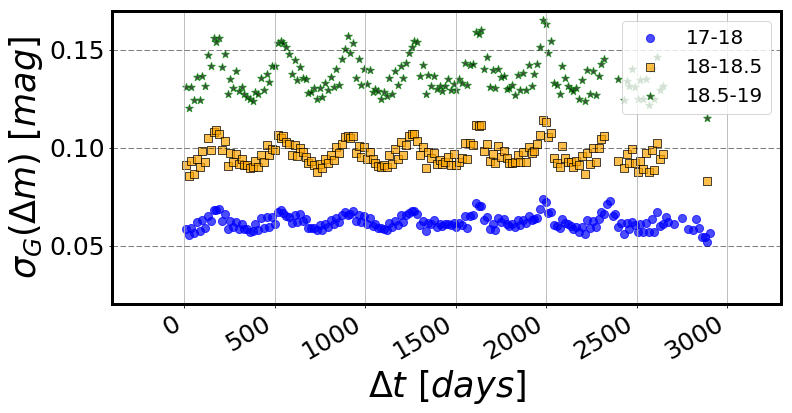

In [48]:
# Plot using results of selecting equal number of points per bin ...
%matplotlib inline

fig, ax3 = plt.subplots(1,1, figsize=(12,6), sharex=True)

# set all plot parameters
lh_w   = 1.0  # horizontal line thickness 
lh_st  = '--' # horizontal line style 
lh_al  = 0.5  # horizontal line alpha parameter 

pre = {'qso':'QSO', 'stars':'Stars'}

facecolors = {17: 'blue', 18: 'orange', 18.5 : 'black'}
edgecolors  = {17:'blue',  18:'black', 18.5:'green'}
markers = {17:'o',     18: 's',      18.5: '*'}
labels  = {17:'17-18', 18:'18-18.5', 18.5:'18.5-19'}

cm = plt.cm.get_cmap('RdYlBu')

for Min in [17,18,18.5] : 
    x  = plot_dic[Min]['mean_tau']
    y  = plot_dic[Min]['bin_sigmaG']
    print('N bins with lt 20000 points : %d'% np.sum(np.isnan(y)))
    ax3.scatter(x,y  , label = labels[Min], alpha=0.7, marker = markers[Min],
               s=65, facecolors=facecolors[Min], edgecolors = edgecolors[Min])
ymin= 0.04
dy = 0.13
ax3.set_ylim(0.02, ymin+dy)
#ax3.set_ylim(0.06, 0.17)
ax3.set_xlim(-400, 3300)
yticks = ax3.get_yticks()
ax3.set_yticks(yticks[1:-1]) 
ax3.set_ylabel(r'$\sigma_{G}(\Delta m)\,\,  [mag]$')
ax3.set_xlabel(r'$\Delta t \, \, [days]$')
plt.legend(loc='upper right', fontsize=20)

fig.autofmt_xdate()
fig.subplots_adjust(hspace=0)

for ax in [ax3] : 
    ax.grid(axis='x')
    for y in [0.05,0.1, 0.15]:
        ax.axhline(y=y, color='black', lw=lh_w, ls=lh_st,alpha=lh_al)

title = pre[obj] +'_CRTS_wiggles.png'
plt.savefig(outDir+title,  bbox_inches='tight')
print('Saved as %s'%outDir+title)


